In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import os
from __future__ import division

%matplotlib inline

In [2]:
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=4):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
#     left_lines_count = 0
#     right_lines_count = 0
    
#     left_slope = 0
#     right_slope = 0

    # image fields 
    ysize = img.shape[0]
    xsize = img.shape[1]
    max_top = 330

    # Hold all the points from valid lines
    l_x1_arr = []
    l_x2_arr = []
    l_y1_arr = []
    l_y2_arr = []
    
    r_x1_arr = []
    r_x2_arr = []
    r_y1_arr = []
    r_y2_arr = []
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            slope = ((y2-y1) / (x2-x1))
            if slope < -.6 and slope > -.9:
                l_x1_arr.append(x1)
                l_x2_arr.append(x2)
                l_y1_arr.append(y1)
                l_y2_arr.append(y2)
            elif slope > .45 and slope < .75:
                r_x1_arr.append(x1)
                r_x2_arr.append(x2)
                r_y1_arr.append(y1)
                r_y2_arr.append(y2)
    
    try:
        # right line
        avg_r_x1 = int(sum(r_x1_arr) / float(len(r_x1_arr)))
        avg_r_x2 = int(sum(r_x2_arr) / float(len(r_x2_arr)))
        avg_r_y1 = int(sum(r_y1_arr) / float(len(r_y1_arr)))
        avg_r_y2 = int(sum(r_y2_arr) / float(len(r_y2_arr)))
        r_slope = ((avg_r_y2-avg_r_y1) / (avg_r_x2-avg_r_x1))
        
        r_y1 = max_top
        r_x1 = int(avg_r_x1 + (r_y1 - avg_r_y1) / r_slope)
        r_y2 = 550
        r_x2 = int(avg_r_x1 + (r_y2 - avg_r_y1) / r_slope)
        
        cv2.line(img, (r_x1, r_y1), (r_x2, r_y2), color, thickness)

    except Exception as ex:
        # print(ex)
        pass
    
    try:
        # left line
        avg_l_x1 = int(sum(l_x1_arr) / float(len(l_x1_arr)))
        avg_l_x2 = int(sum(l_x2_arr) / float(len(l_x2_arr)))
        avg_l_y1 = int(sum(l_y1_arr) / float(len(l_y1_arr)))
        avg_l_y2 = int(sum(l_y2_arr) / float(len(l_y2_arr)))
        l_slope = ((avg_l_y2-avg_l_y1) / (avg_l_x2-avg_l_x1))

        l_y1 = max_top
        l_x1 = int(avg_l_x1 + (l_y1 - avg_l_y1) / l_slope)
        l_y2 = 550
        l_x2 = int(avg_l_x1 + (l_y2 - avg_l_y1) / l_slope)
        
        cv2.line(img, (l_x1, l_y1), (l_x2, l_y2), color, thickness)
    except Exception as ex:
        # print(ex)
        pass
    
   
    
                
#             cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, γ)

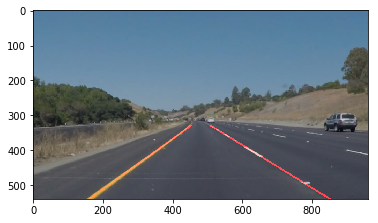

In [3]:
for image_name in os.listdir('test_images/'):
    image = mpimg.imread('test_images/' + str(image_name))
    
    # Get the x and y sizes and make a copy of the image
    ysize = image.shape[0]
    xsize = image.shape[1]
    
    # Apply grayscale 
    gray = grayscale(image)
    # GaussianBlur 
    kernel_size = 5
    gauss = gaussian_blur(gray, kernel_size)
    
    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = canny(gauss, low_threshold, high_threshold)
    

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(100,imshape[0]),((xsize / 2) - 30, (ysize / 2) + 50), ((xsize / 2) + 20, (ysize / 2) + 50), (imshape[1],imshape[0])]], dtype=np.int32)
    masked_edges = region_of_interest(edges, vertices)

    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 2 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 25     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 40 #minimum number of pixels making up a line
    max_line_gap = 15    # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on
    line_image = hough_lines(masked_edges, rho, theta, threshold, min_line_length, max_line_gap)

    plt.imshow(weighted_img(line_image, image))
    
    mpimg.imsave('test_images_output/after-' + str(image_name), weighted_img(line_image, image))

In [10]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [11]:
def process_image(image):
    initial_image = np.copy(image)
    ysize = image.shape[0]
    xsize = image.shape[1]
    
    # Apply grayscale 
    gray = grayscale(image)
    # GaussianBlur 
    kernel_size = 5
    gaus_blur = gaussian_blur(image, kernel_size)
    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = canny(gaus_blur, low_threshold, high_threshold)

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(100,imshape[0]),((xsize / 2) - 20, (ysize / 2) + 60), ((xsize / 2) + 20, (ysize / 2) + 60), (imshape[1],imshape[0])]], dtype=np.int32)
    masked = region_of_interest(edges, vertices)

    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 2 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 25     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 40 #minimum number of pixels making up a line
    max_line_gap = 15    # maximum gap in pixels between connectable line segments
    line_image = hough_lines(masked, rho, theta, threshold, min_line_length, max_line_gap)
    

    return weighted_img(line_image, initial_image)

In [12]:
white_output = 'test_videos_output/solidYellowLeft.mp4'
clip1 = VideoFileClip("test_videos/solidYellowLeft.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|█████████▉| 681/682 [00:50<00:00, 12.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

CPU times: user 13.9 s, sys: 715 ms, total: 14.6 s
Wall time: 52.5 s


In [13]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))